In [4]:
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
import rpy2.robjects as ro
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from rpy2.robjects.conversion import localconverter

%matplotlib inline
openair = importr('openair')
pandas2ri.activate()



rdevcopy = ro.r['dev.copy']
rdevoff = ro.r['dev.off']
png = ro.r['png']

In [8]:
dir = "/dta/monitoring-PL/2019"
df = pd.read_csv (dir+"/PM10_1h_2019.csv", sep =';', na_values=[-999], header=0)
pm10 = df[["id","LdLodzCzerni"]]
print(type(pm10))
print(pm10.head())

<class 'pandas.core.frame.DataFrame'>
                 id  LdLodzCzerni
0  01.01.2019 01:00          70.0
1  01.01.2019 02:00          38.0
2  01.01.2019 03:00          30.0
3  01.01.2019 04:00          30.0
4  01.01.2019 05:00          30.0


In [9]:
PM25 = pd.read_csv (dir+"/PM25_1h_2019.csv", sep =';', na_values=[-999],
                    header=0)[["id","LdLodzCzerni"]]
pm1025 = pd.merge(pm10,PM25,on='id')
print(pm1025.head())

                 id  LdLodzCzerni_x  LdLodzCzerni_y
0  01.01.2019 01:00            70.0          58.045
1  01.01.2019 02:00            38.0          32.032
2  01.01.2019 03:00            30.0          24.856
3  01.01.2019 04:00            30.0          24.856
4  01.01.2019 05:00            30.0          24.856


In [10]:
O3 = pd.read_csv (dir+"/O3_1h_2019.csv", sep =';', na_values=[-999],
                  header=0)[["id","LdLodzCzerni"]]
pm1025O3 = pd.merge(pm1025,O3,on='id')
print(pm1025O3.head())

                 id  LdLodzCzerni_x  LdLodzCzerni_y  LdLodzCzerni
0  01.01.2019 01:00            70.0          58.045          41.9
1  01.01.2019 02:00            38.0          32.032          46.8
2  01.01.2019 03:00            30.0          24.856          47.8
3  01.01.2019 04:00            30.0          24.856          46.1
4  01.01.2019 05:00            30.0          24.856          44.2


In [11]:
pm1025O3.rename(columns={"LdLodzCzerni_x":"PM10","LdLodzCzerni_y":"PM25",
                          "LdLodzCzerni":"O3"},inplace=True)
print(pm1025O3.head())

                 id  PM10    PM25    O3
0  01.01.2019 01:00  70.0  58.045  41.9
1  01.01.2019 02:00  38.0  32.032  46.8
2  01.01.2019 03:00  30.0  24.856  47.8
3  01.01.2019 04:00  30.0  24.856  46.1
4  01.01.2019 05:00  30.0  24.856  44.2


In [13]:
print(type(pm1025O3['id'][0]))

<class 'str'>


In [15]:
pm1025O3['date'] = (pd.to_datetime(pm1025O3['id']))-pd.Timedelta('1 hour')
print(pm1025O3.head())

                 id  PM10    PM25    O3                date
0  01.01.2019 01:00  70.0  58.045  41.9 2019-01-01 00:00:00
1  01.01.2019 02:00  38.0  32.032  46.8 2019-01-01 01:00:00
2  01.01.2019 03:00  30.0  24.856  47.8 2019-01-01 02:00:00
3  01.01.2019 04:00  30.0  24.856  46.1 2019-01-01 03:00:00
4  01.01.2019 05:00  30.0  24.856  44.2 2019-01-01 04:00:00


In [16]:
dm = pd.read_csv ('/dta/synop/2019/12465.csv',parse_dates=True,
na_values=['-99999','-99999.0000',' -99999 ',' -99999'])
print(dm.head)

<bound method NDFrame.head of                              date   ws   wd   tt   td  rh           sp  \
0      2019-01-01 00:00:00 +00:00  3.0  220  0.0 -1.1  92  1004.700010   
1      2019-01-01 01:00:00 +00:00  3.0  220  0.5 -1.0  89  1003.700010   
2      2019-01-01 02:00:00 +00:00  4.0  230  0.9 -0.6  89  1002.400020   
3      2019-01-01 03:00:00 +00:00  4.0  210  1.4 -0.1  89  1000.400020   
4      2019-01-01 04:00:00 +00:00  4.0  220  1.7  0.7  93   999.099976   
...                           ...  ...  ...  ...  ...  ..          ...   
8752   2019-12-31 19:00:00 +00:00  6.0  290  5.0  1.3  76  1004.000000   
8753   2019-12-31 20:00:00 +00:00  7.0  290  4.9  1.2  76  1004.299990   
8754   2019-12-31 21:00:00 +00:00  5.0  290  4.3  1.2  80  1005.200010   
8755   2019-12-31 22:00:00 +00:00  5.0  290  3.0  0.7  84  1006.000000   
8756   2019-12-31 23:00:00 +00:00  5.0  280  2.7  0.6  86  1006.500000   

              rp   pt     wx  cc     cl     cm     ch  
0     1027.69995  2.1    

In [17]:
dm['date'] = (pd.to_datetime(dm['date']))
dm['date'] = dm['date'].dt.tz_convert(None)

In [18]:
dxf = pd.merge(dm,pm1025O3, on='date')
print (dxf.head())

                 date   ws   wd   tt   td  rh           sp          rp   pt  \
0 2019-01-01 00:00:00  3.0  220  0.0 -1.1  92  1004.700010  1027.69995  2.1   
1 2019-01-01 01:00:00  3.0  220  0.5 -1.0  89  1003.700010  1026.69995  2.2   
2 2019-01-01 02:00:00  4.0  230  0.9 -0.6  89  1002.400020  1025.30005  2.8   
3 2019-01-01 03:00:00  4.0  210  1.4 -0.1  89  1000.400020  1023.20001  4.3   
4 2019-01-01 04:00:00  4.0  220  1.7  0.7  93   999.099976  1021.90002  4.6   

   wx  cc     cl     cm     ch                id  PM10    PM25    O3  
0  10   7 -99999 -99999 -99999  01.01.2019 01:00  70.0  58.045  41.9  
1  10   7      5 -99999 -99999  01.01.2019 02:00  38.0  32.032  46.8  
2  10   7 -99999 -99999 -99999  01.01.2019 03:00  30.0  24.856  47.8  
3  10   8      6 -99999 -99999  01.01.2019 04:00  30.0  24.856  46.1  
4  51   8      6 -99999 -99999  01.01.2019 05:00  30.0  24.856  44.2  


In [20]:
dx = dxf[["date","ws","wd","PM10","PM25","O3"]]
print(dx.head())

                 date   ws   wd  PM10    PM25    O3
0 2019-01-01 00:00:00  3.0  220  70.0  58.045  41.9
1 2019-01-01 01:00:00  3.0  220  38.0  32.032  46.8
2 2019-01-01 02:00:00  4.0  230  30.0  24.856  47.8
3 2019-01-01 03:00:00  4.0  210  30.0  24.856  46.1
4 2019-01-01 04:00:00  4.0  220  30.0  24.856  44.2


In [21]:
null_columns = dx.columns[dx.isna().any()]
print(dx[null_columns].isna().sum())

ws        1
PM10    115
PM25    114
O3      120
dtype: int64


In [22]:
dx.describe()

,ws,wd,PM10,PM25,O3
count,8756.000000,8757.000000,8642.000000,8643.000000,8637.000000
mean,3.274897,164.620418,25.560750,17.694569,57.045282
std,2.042085,1075.303506,15.462775,13.159234,29.654675
min,0.000000,-99999.000000,2.000000,0.637000,2.100000
25%,2.000000,90.000000,14.000000,8.000000,35.500000
50%,3.000000,200.000000,22.000000,14.000000,55.100000
75%,4.000000,260.000000,32.000000,24.000000,76.000000
max,15.000000,360.000000,132.000000,97.000000,163.100000


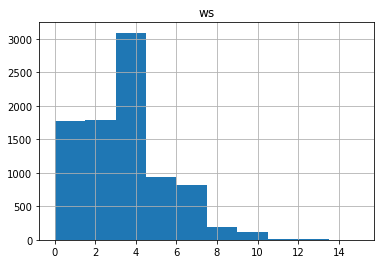

In [23]:
dx.hist(column='ws')
plt.show()

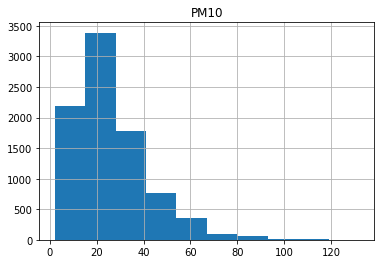

In [24]:
dx.hist(column='PM10')
plt.show()

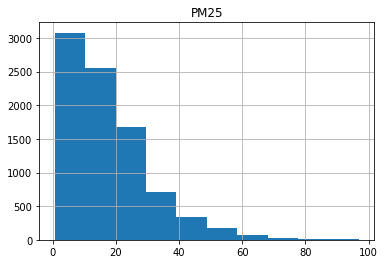

In [26]:
dx.hist(column='PM25')
plt.show()

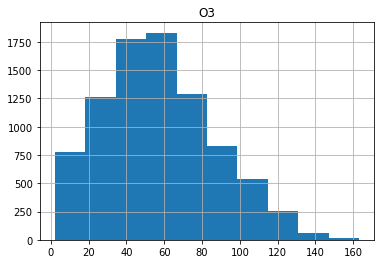

In [27]:
dx.hist(column='O3')
plt.show()

In [28]:
with localconverter(ro.default_converter + pandas2ri.converter):
    rdx=ro.conversion.py2rpy(dx)
    print(type(rdx))

<class 'rpy2.robjects.vectors.DataFrame'>


In [30]:
print(rdx.head())

                       date   ws   wd  PM10    PM25    O3
0 2019-01-01 00:00:00+01:00  3.0  220  70.0  58.045  41.9
1 2019-01-01 01:00:00+01:00  3.0  220  38.0  32.032  46.8
2 2019-01-01 02:00:00+01:00  4.0  230  30.0  24.856  47.8
3 2019-01-01 03:00:00+01:00  4.0  210  30.0  24.856  46.1
4 2019-01-01 04:00:00+01:00  4.0  220  30.0  24.856  44.2
5 2019-01-01 05:00:00+01:00  4.0  220  28.0  23.959  42.8


In [31]:
r_base = importr('base')
edsummary = r_base.summary(rdx.rx2("PM10"))
print(edsummary)

/usr/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:197: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


[  2.          14.          22.          25.56074983  32.
 132.         115.        ]


In [32]:
r_base = importr('base')
edsummary = r_base.summary(rdx.rx2("PM25"))
print(edsummary)

[  0.637        8.          14.          17.69456948  24.
  97.         114.        ]


In [33]:
r_base = importr('base')
edsummary = r_base.summary(rdx.rx2("O3"))
print(edsummary)

[  2.1         35.5         55.1         57.04528193  76.
 163.1        120.        ]


In [34]:
openair.summaryPlot(mydata=rdx)

    date1     date2        ws        wd      PM10      PM25        O3 
"POSIXct"  "POSIXt" "numeric" "integer" "numeric" "numeric" "numeric" 


R object with classes: ('text', 'grob', 'gDesc') mapped to:
[StrSexpVe..., FloatSexp..., FloatSexp..., StrSexpVe..., ..., BoolSexpV..., StrSexpVe..., ListSexpV..., NULLType]
  label: <class 'numpy.ndarray'>
  array([], dtype=float64)
  x: <class 'numpy.ndarray'>
  array([0.5])
  y: <class 'numpy.ndarray'>
  array([1.])
  just: <class 'numpy.ndarray'>
  array(['centre'], dtype='<U6')
...
  vjust: <class 'numpy.ndarray'>
  array([0], dtype=int32)
  rot: <class 'numpy.ndarray'>
  array(['GRID.text.23'], dtype='<U12')
R object with classes: ('text', 'grob', 'gDesc') mapped to:
[StrSexpVe..., FloatSexp..., FloatSexp..., StrSexpVe..., ..., BoolSexpV..., StrSexpVe..., ListSexpV..., NULLType]
  name: <class 'rpy2.rinterface.NULLType'>
  <rpy2.rinterface.NULLType object at 0x7f3510115640> [RTYPES.NILSXP]

In [ ]:
openair.calendarPlot(mydata=rdx,pollutant="PM10")

In [ ]:
openair.calendarPlot(mydata=rdx,pollutant="PM25")

In [ ]:
openair.calendarPlot(mydata=rdx,pollutant="O3")

In [ ]:
openair.timePlot(mydata=rdx,pollutant="PM10",smooth=True)

In [ ]:
openair.timePlot(mydata=rdx,pollutant="PM25",smooth=True)

In [ ]:
openair.timePlot(mydata=rdx,pollutant="O3",smooth=True)

In [ ]:
openair.TheilSen(mydata=rdx,pollutant="PM10",ylab="PM10 [ug/m3]")

In [ ]:
openair.TheilSen(mydata=rdx,pollutant="PM25",ylab="PM25 [ug/m3]")

In [ ]:
openair.TheilSen(mydata=rdx,pollutant="O3",ylab="O3 [ug/m3]")

In [ ]:
***** comparing 2 pollutants ********

In [ ]:
pollutants = ro.StrVector(['PM10', 'PM25'])
openair.timePlot(mydata=rdx,pollutant=pollutants,smooth=True)

In [ ]:
pollutants = ro.StrVector(['PM10', 'O3'])
openair.timePlot(mydata=rdx,pollutant=pollutants,smooth=True)

In [ ]:
pollutants = ro.StrVector(['PM25', 'O3'])
openair.timePlot(mydata=rdx,pollutant=pollutants,smooth=True)

In [ ]:
***************** Using Wind Rose ***********

In [ ]:
openair.windRose(mydata=rdx,angle=10)

In [ ]:
openair.pollutionRose(mydata=rdx,angle=10,pollutant="PM10")

In [ ]:
openair.pollutionRose(mydata=rdx,angle=10,pollutant="PM25")

In [ ]:
openair.pollutionRose(mydata=rdx,angle=10,pollutant="O3")

In [ ]:
*******************Conditioned pollution wind roses (Stratification of data into several subset based on concentrations of other pollutants)

In [ ]:
openair.pollutionRose(mydata=rdx,angle=10,pollutant="PM10",type="PM25", layout=ro.IntVector([4, 1]))

In [ ]:
openair.pollutionRose(mydata=rdx,angle=10,pollutant="PM25",type="PM10",
layout=ro.IntVector([4, 1]))

In [ ]:
openair.pollutionRose(mydata=rdx,angle=10,pollutant="O3",type="PM10",
layout=ro.IntVector([4, 1]))

In [ ]:
******************Polar frequency**************

In [ ]:
subset = rdx.rx(rdx.rx2('ws').ro > 10, True)
openair.polarFreq(subset,pollutant= "PM10",ws_int = 10, statistic = "weighted.mean")

In [ ]:
openair.polarFreq(mydata=rdx,pollutant="PM10",statistic="max")

In [ ]:
openair.polarFreq(mydata=rdx,pollutant="PM25",statistic="max")

In [ ]:
openair.polarFreq(mydata=rdx,pollutant="O3",statistic="max")

In [ ]:
********************************************
Subsetting:to filter out some data which hinder our analysis,
eg. low windspeeds

In [ ]:
rdx.rx2('ws')

In [ ]:
rdx.rx2('ws')>2

In [ ]:
subset = rdx.rx(rdx.rx2('ws') > 2, True)

In [ ]:
openair.polarFreq(subset,pollutant="PM10",statistic="weighted.mean")

In [ ]:
openair.polarFreq(subset,pollutant="PM25",statistic="weighted.mean")

In [ ]:
openair.polarFreq(subset,pollutant="O3",statistic="weighted.mean")

In [ ]:
*************************Polar plot**************************

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="PM10",statistic="mean")

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="PM25",statistic="mean")

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="O3",statistic="mean")

In [ ]:
******************************************************************************
In order to eliminate bins that contain small numbers of elements

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="PM10",min_bin=2,statistic="mean")

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="PM25",min_bin=2,statistic="mean")

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="O3",min_bin=2,statistic="mean")

In [ ]:
*******************Seasonal variations *******************

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="PM10",type="season",
layout=ro.IntVector([4, 1]))

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="PM25",type="season",
layout=ro.IntVector([4, 1]))

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="O3",type="season",
layout=ro.IntVector([4, 1]))

In [ ]:
********** hourly variations *****************

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="PM10",type="hour",
layout=ro.IntVector([6, 4]), k=50)

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="PM25",type="hour",
layout=ro.IntVector([6, 4]), k=50)

In [ ]:
openair.polarPlot(mydata=rdx,angle=10,pollutant="O3",type="hour",
layout=ro.IntVector([6, 4]), k=50)

In [ ]:
************************time variation plots******************************

In [ ]:
openair.timeVariation (mydata=rdx,pollutant="PM10")

In [ ]:
openair.timeVariation (mydata=rdx,pollutant="PM25")

In [ ]:
openair.timeVariation (mydata=rdx,pollutant="O3")